# TMP exploration

In [ ]:
import torch
all_scores = torch.load('tmp_scores.pt', map_location=torch.device('cpu'))

In [ ]:
len(all_scores[0])

In [ ]:
scores = all_scores[0]

In [ ]:
scores.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(scores[1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(scores.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

In [ ]:
import torch
all_E = torch.load('tmp_E.pt', map_location=torch.device('cpu'))

In [ ]:
E, E_v = all_E[0]

In [ ]:
E.shape

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(E.reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

---
---
---

# Visualize experiments results

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
#import seaborn as sns

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


You can chose to study a run among these:

In [3]:
!ls /scratch2/clear/ejehanno/models_weights/

 odd
 pcqm4m_subset-GraphiT_EJ_Q+K_V+E_multi-Q+K_V+E_multi_DptConn_4seeds
 zinc-GraphiT_EJ_E_multi_V+E_multi-E_multi_V+E_multi_DptConn_4seeds
 zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads-Q+K+E_multi_V+E_multi_DptConn_noHeads_4seeds
 zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads_DoubleScaling-Q+K+E_multi_V+E_multi_DptConn_noHeads_DoubleScaling_4seeds
 zinc-GraphiT_EJ_Q+K+E_multi_VE_multi_noHeads_DoubleScaling-Q+K+E_multi_VE_multi_DptConn_noHeads_DoubleScaling_4seeds
 zinc-GraphiT_EJ_QK+E_mono_V+E_multi-QK+E_mono_V+E_multi_DptConn_4seeds
 zinc-GraphiT_EJ_QK+E_mono_V-QK+E_mono_V_DptConn_4seeds
 zinc-GraphiT_EJ_QK+E_multi_V+E_multi_AdjMask-QK+E_multi_V+E_multi_DptConn_AdjMask_4seeds
 zinc-GraphiT_EJ_QK+E_multi_V+E_multi_AdjMask_noRings-QK+E_multi_V+E_multi_DptConn_AdjMask_noCoalesce_4seeds
 zinc-GraphiT_EJ_QK+E_multi_V+E_multi_AdjMask_noRings-QK+E_multi_V+E_multi_DptConn_AdjMask_noRings_4seeds
'zinc-GraphiT_EJ_tests-E*V+E_DptConn_4seeds'
'zinc-GraphiT_EJ_tests-Q+K+E_multi*V*E_multi_DptCo

By relaunching
```bash
python main.py --cfg /scratch2/clear/ejehanno/models_weights/zinc-GraphiT_EJ_Q+K+E_multi_V+E_multi_noHeads_DoubleScaling-Q+K+E_multi_V+E_multi_DptConn_noHeads_DoubleScaling_4seeds/\(Q+K+E_multi\)\*\(V+E_multi\)_DptConn_noHeads_DoubleScaling_4seeds/config.yaml train.auto_resume True
```
Or Whatever

In [2]:
def extractor(xp_name):
    # '(QK+E)*(V+E)_multi_DptHead' # cfg.wandb.name
    main_path = '/scratch2/clear/ejehanno/extracted/'
    extracted_path = os.path.join(main_path, xp_name)
    all_scores = torch.load(os.path.join(extracted_path, 'scores.pt'),
                            map_location=torch.device('cpu'))
    all_E = torch.load(os.path.join(extracted_path, 'Ea.pt'),
                            map_location=torch.device('cpu'))
    all_Ev = torch.load(os.path.join(extracted_path, 'Ev.pt'),
                            map_location=torch.device('cpu'))
    batch = torch.load(os.path.join(extracted_path, 'batch.pt'),
                            map_location=torch.device('cpu'))
    return all_scores, all_E, all_Ev, batch

In [3]:
all_scores, all_E, all_Ev, batch = extractor('(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds')

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


## Exploration of the techniques

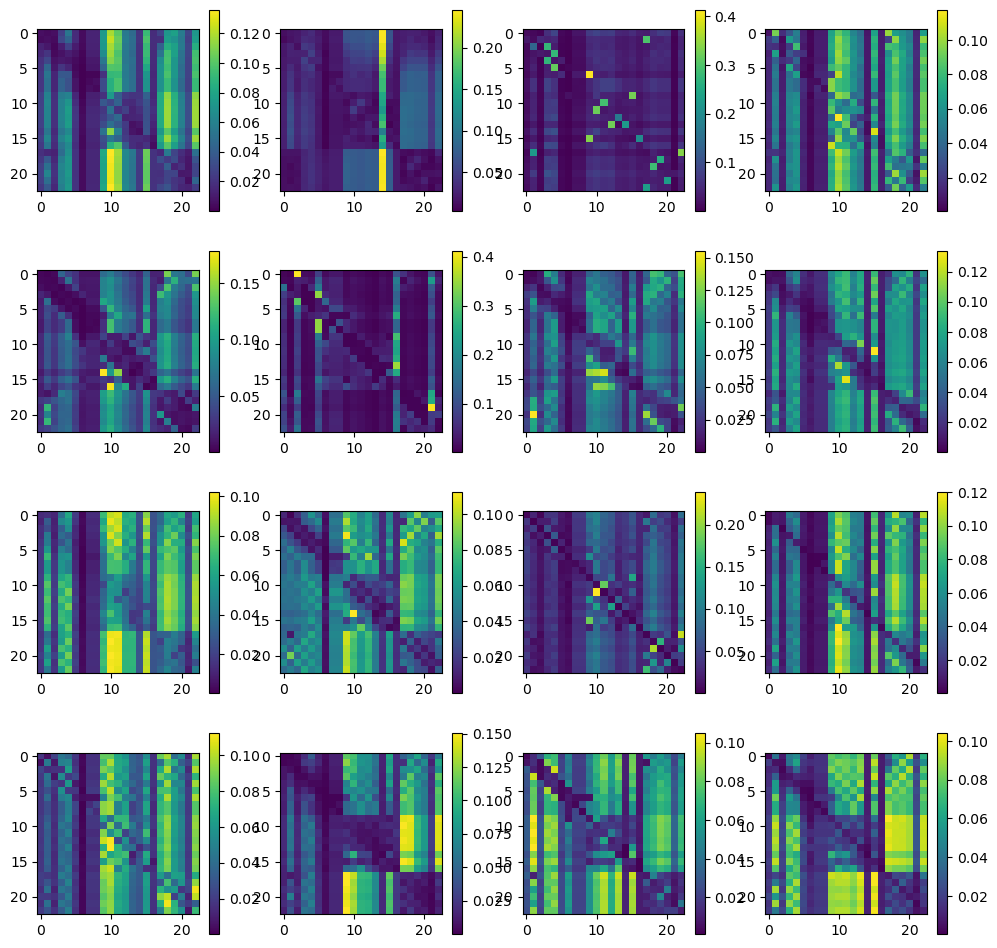

In [7]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

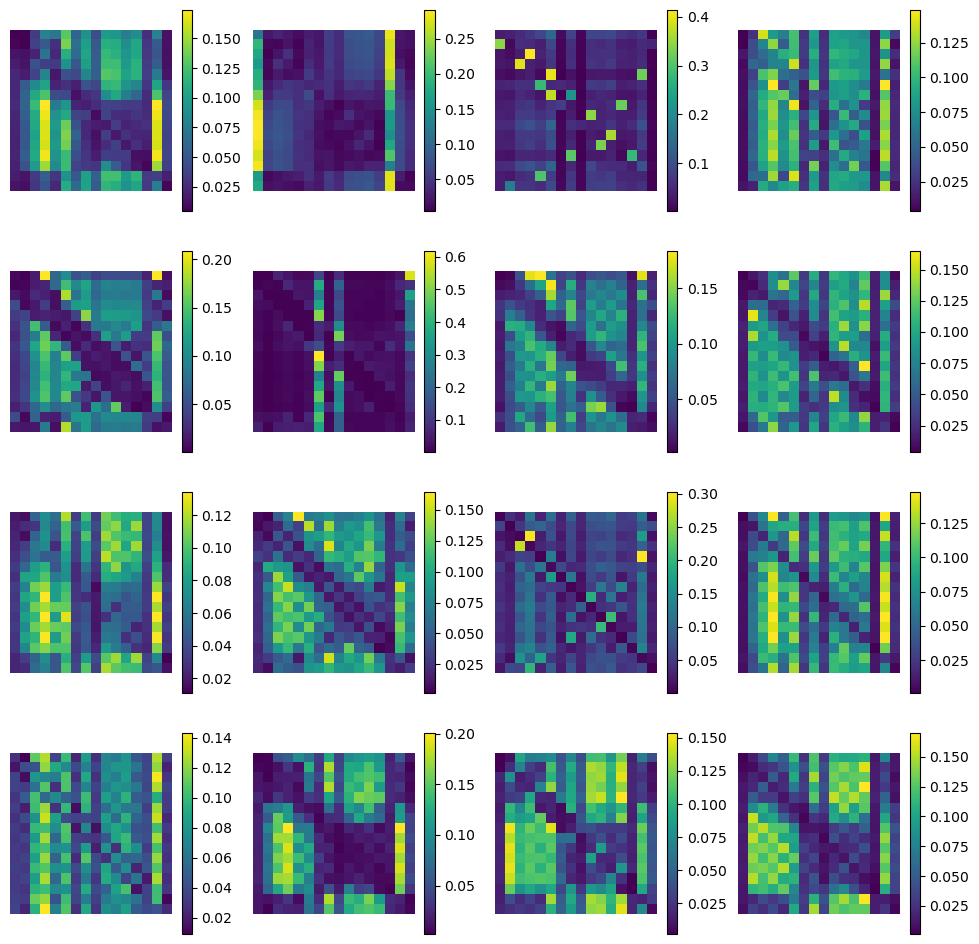

In [8]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][0,:16,:16,0,idx].numpy())
    plt.colorbar()
    plt.axis('off')
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

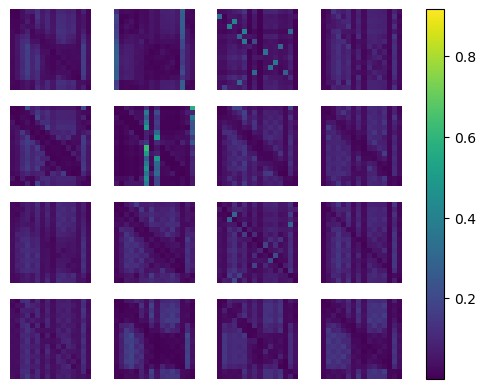

In [9]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
fig, axes = plt.subplots(nrows=4, ncols=4)
cmap=cm.get_cmap('viridis')
normalizer=Normalize(all_scores[0][0,:16,:16,0,:].min(),all_scores[0][0,:16,:16,0,:].max())
im=cm.ScalarMappable(norm=normalizer)
for idx, ax in enumerate(axes.flat):
    im = ax.imshow(all_scores[0][0,:16,:16,0,idx].numpy(),cmap=cmap,norm=normalizer)
    #plt.colorbar()
    ax.axis('off')
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

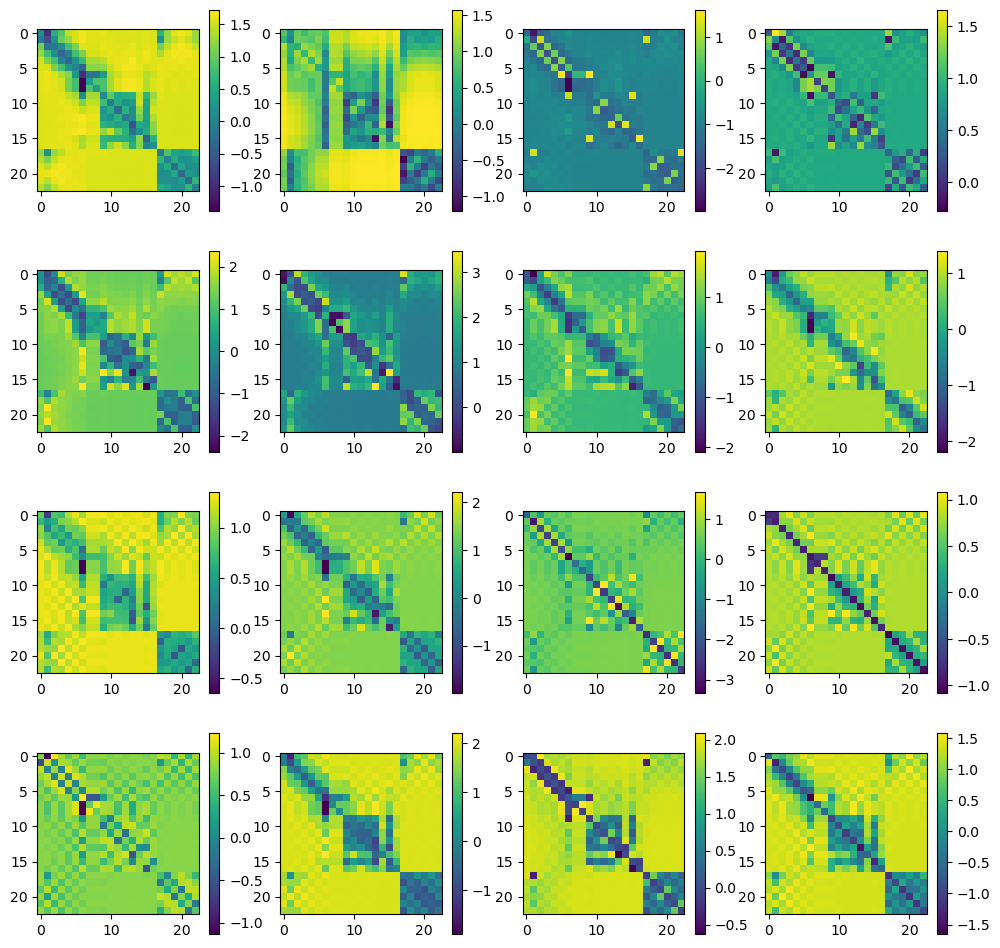

In [10]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_E[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

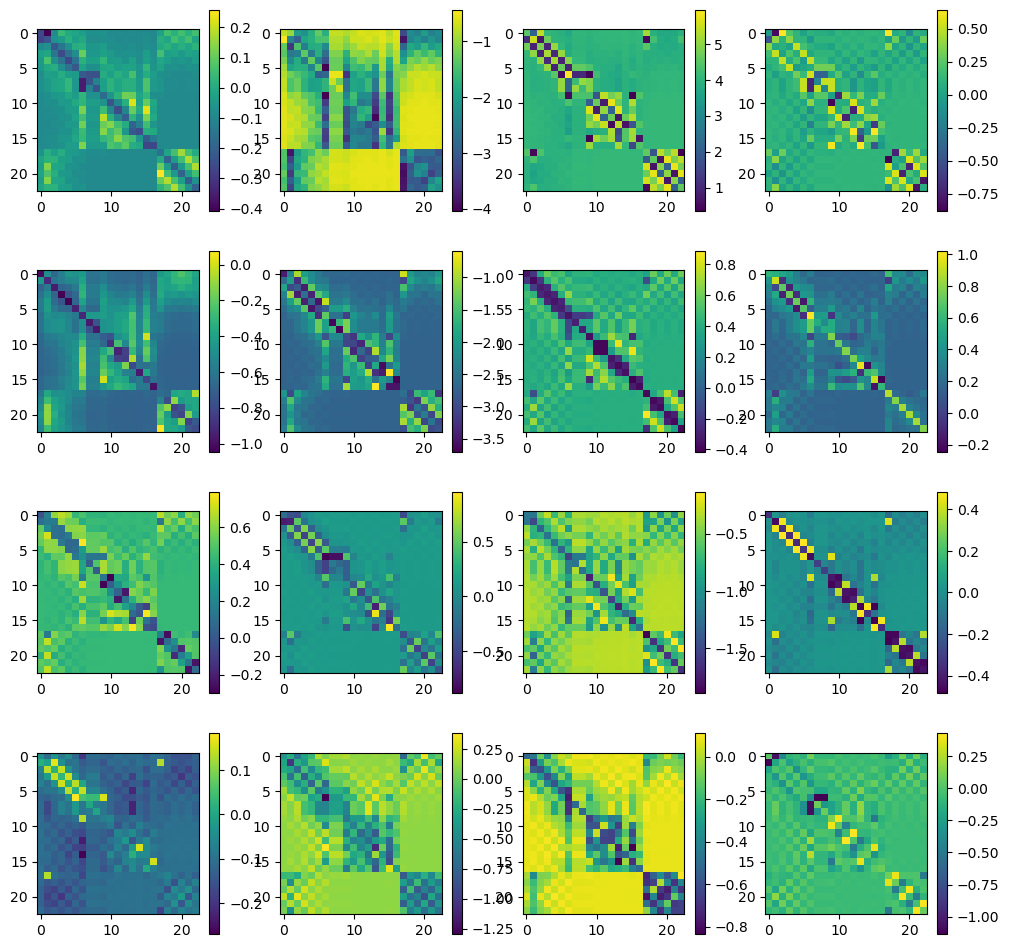

In [11]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_Ev[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

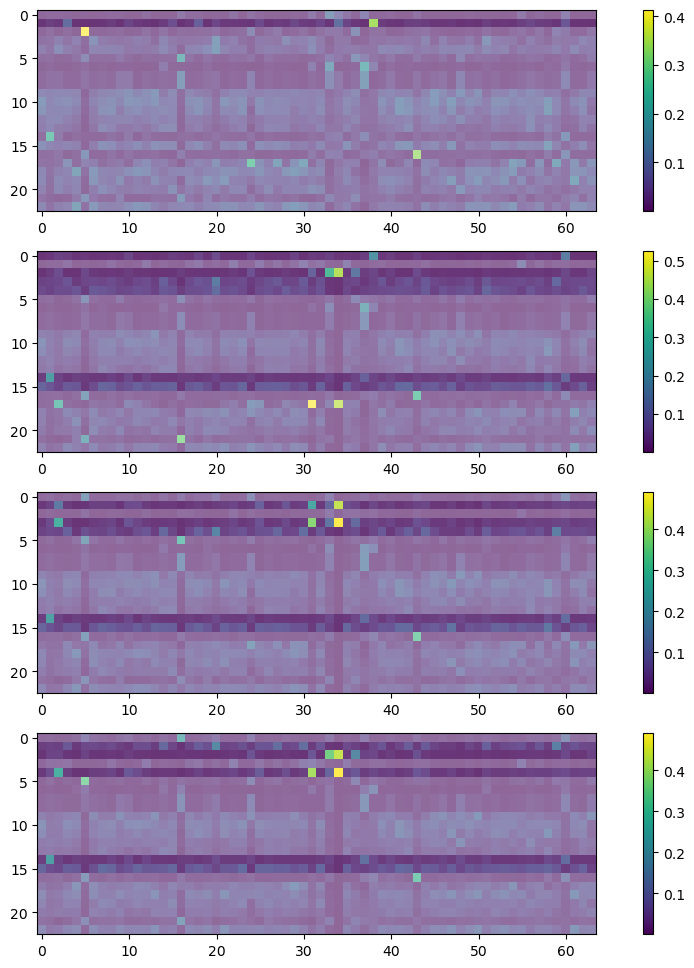

In [12]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy()
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), 
                             repeats=loc_scores.shape[-1], axis=1)
    ax = main.add_subplot(4,1,idx+1)
    ax.imshow(loc_scores, alpha=transparency*.1)
    im = tmp.imshow(loc_scores, alpha=1.0)
    main.colorbar(im, ax=ax)
plt.close(tampon)
main.show()

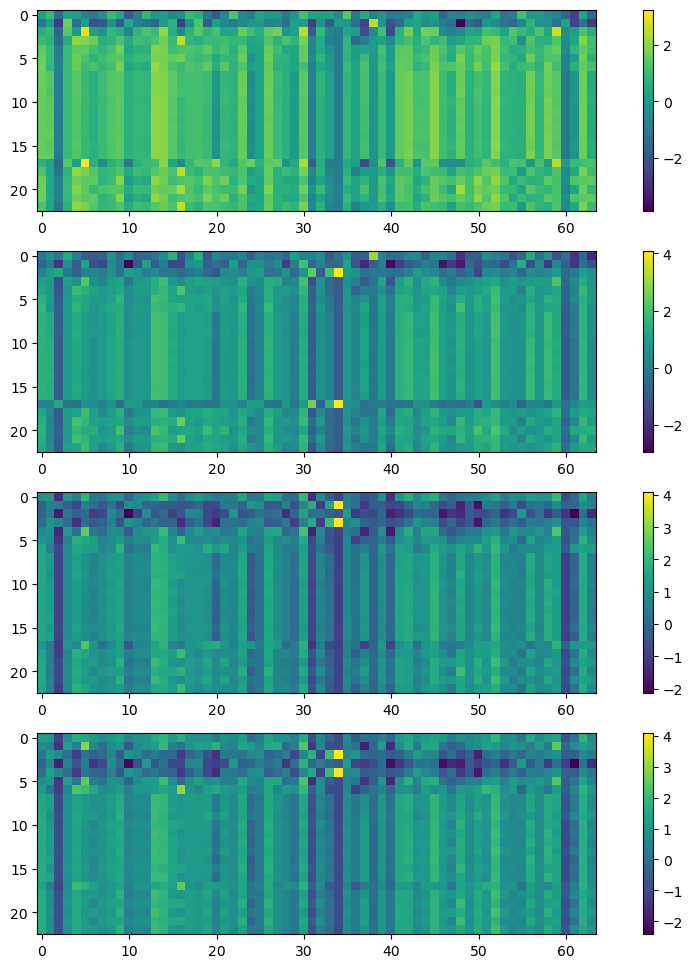

In [13]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_E[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

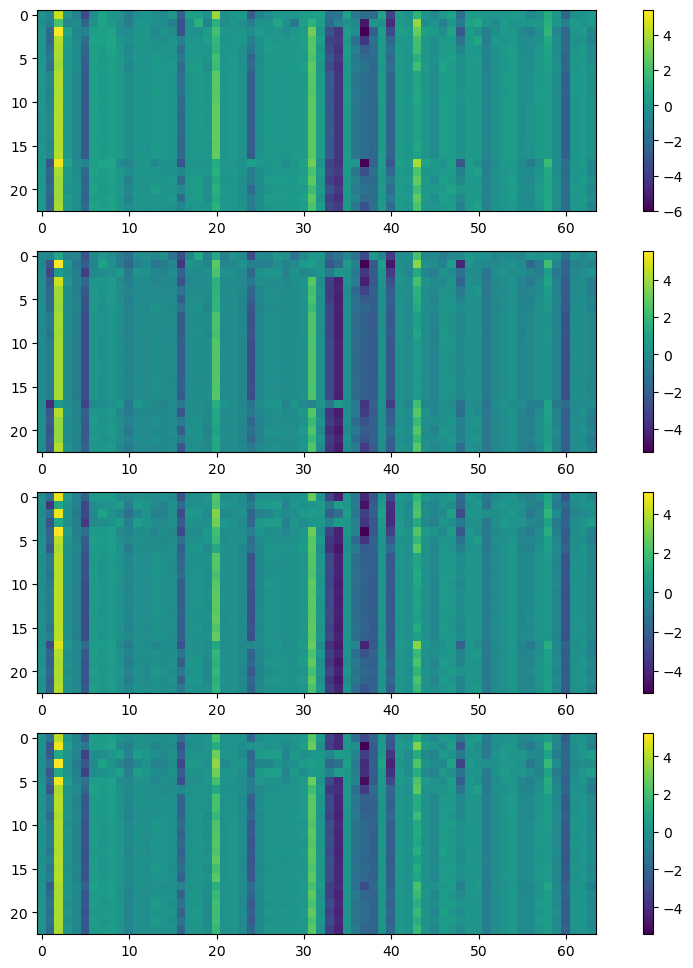

In [14]:
plt.figure(figsize=(12,12))
for idx in range(4):
    plt.subplot(4,1,idx+1)
    plt.imshow(all_Ev[0].reshape(32, 31, 31, -1)[1,idx,:23,:].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Now we dive into the details for interesting ones

In [ ]:
all_scores, all_E, all_Ev, batch = extractor(
    '(Q+K+E_multi)*(V+E_multi)_DptConn_noHeads_DoubleScaling_4seeds'
)

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(16):
    plt.subplot(4,4,idx+1)
    plt.imshow(all_scores[0][1,:23,:23,0,idx].numpy())
    plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

In [ ]:
plt.figure(figsize=(12,12))
for idx in range(4):
    loc_scores = all_scores[0].reshape(32, 31, 31, -1)
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==idx][1].numpy()
    transparency = np.ones(23) * 6 # 6
    transparency[neighbors] += 2 # 8
    transparency = np.repeat(transparency.reshape(-1,1), repeats=loc_scores.shape[-1], axis=1)
    plt.subplot(4,1,idx+1)
    try:
        plt.imshow(loc_scores[1,idx,:23,:].numpy(), alpha=transparency*.1)
    except:
        print(idx)
    #plt.colorbar()
plt.show()
#plt.imshow(np.einsum('ijk,ijk->ij', img, img))

## Publishable version

In [78]:
from torch_geometric.utils import to_dense_batch

In [103]:
# h_dense, mask = to_dense_batch(batch.x, batch.batch)
# mask = mask.unsqueeze(-1) * mask.unsqueeze(1)
# print(all_scores[0][batch_idx].shape)
# all_scores[0][batch_idx][mask[batch_idx]].shape#.reshape(32,31,31,1,-1)\
batch_idx = 4
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)
loc_scores = all_scores[0][batch_idx][mask]
num_nodes = int(np.sqrt(loc_scores.shape[0]))
loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:])).shape

torch.Size([20, 20, 1, 64])

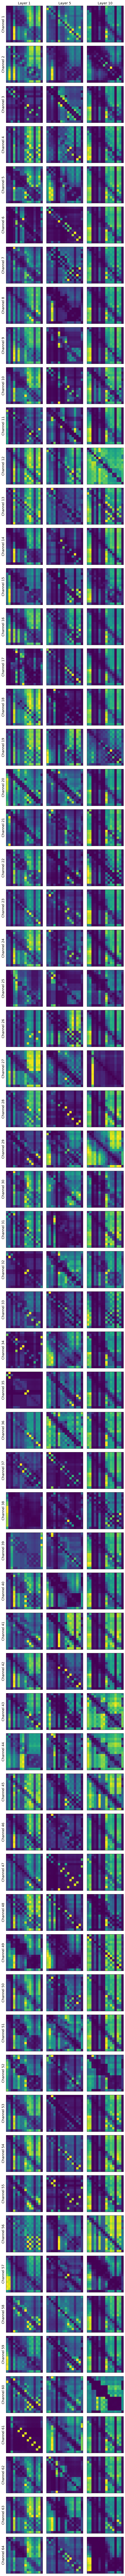

In [117]:
batch_idx = 6 # 6
head_idx = 0
#channel_slice = range(nb_channels)
channel_slice = range(26,30)
# channel_slice = range(44,48)
# channel_slice = range(53,57)
# channel_slice = range(57,61)
nb_channels = len(channel_slice)
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)
plt.figure(figsize=(12,12*int(nb_channels/4)))
for rk, layer_idx in enumerate([0,4,9]):
    for channel_idx in channel_slice:
        loc_scores = all_scores[layer_idx][batch_idx][mask]
        num_nodes = int(np.sqrt(loc_scores.shape[0]))
        loc_scores = loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:]))
        plt.subplot(nb_channels,3,channel_idx*3 + rk + 1)
        plt.imshow(loc_scores[:,:,head_idx,channel_idx].numpy())
        #plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        if rk==0:
            plt.ylabel(f'Channel {channel_idx + 1}', fontsize=14)
        if channel_idx==0:
            plt.title(f'Layer {layer_idx+1}', fontsize=14)
plt.subplots_adjust(wspace=-.5, hspace=.1)
plt.show()

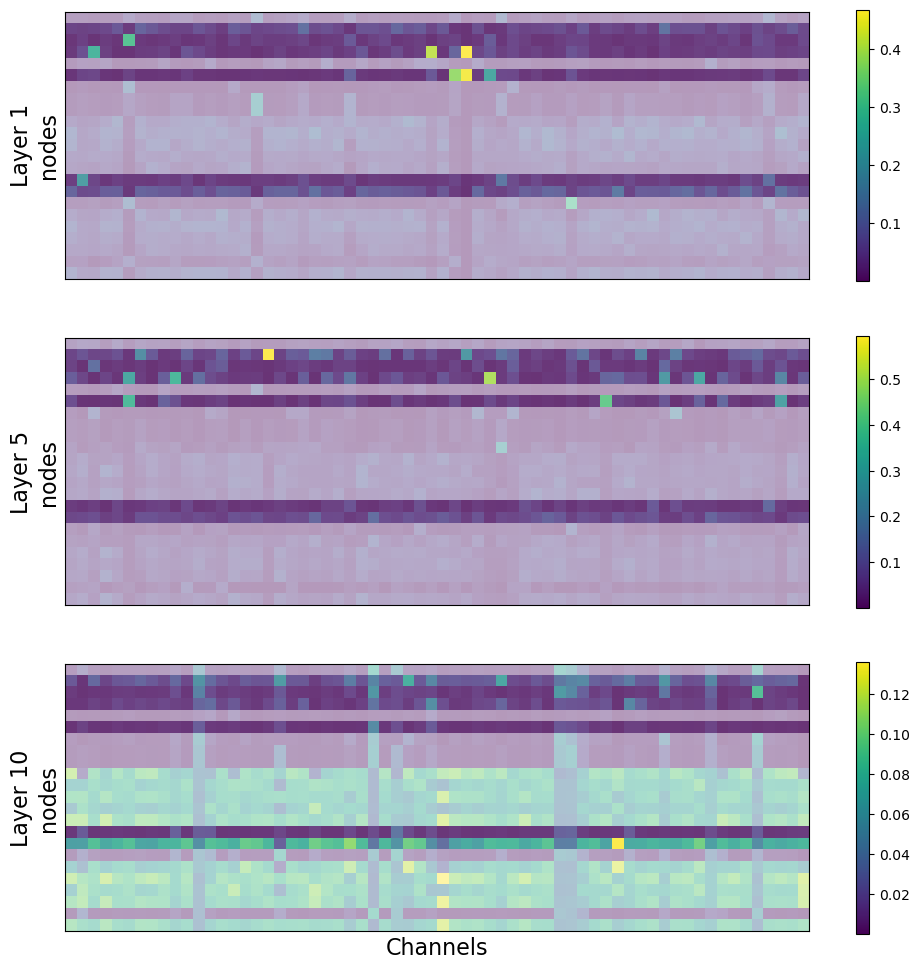

In [26]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
node_idx = 4
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_scores[layer_idx].reshape(32, 31, 31, -1)[1,node_idx,:23,:].numpy()
    neighbors = batch.edge_index[:,batch.edge_index[0,:]==node_idx][1].numpy()
    transparency = np.ones(23) * 4 # 6
    transparency[neighbors] += 4 # 8
    transparency = np.repeat(transparency.reshape(-1,1), 
                             repeats=loc_scores.shape[-1], axis=1)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores, alpha=transparency*.1)
    im = tmp.imshow(loc_scores, alpha=1.0)
    main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

---
---
---
With only a few channels:

In [5]:
from torch_geometric.utils import to_dense_batch

In [3]:
all_scores, all_E, all_Ev, batch = extractor('(QK+E)*(V+E)_DptConn_VerySmall_vf')

/scratch2/clear/ejehanno/miniconda3/envs/graphgps_/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [51]:
batch_idx = 6 # 6
head_idx = 0
node_idx = 4
batch_node_idx = batch.ptr[batch_idx] + node_idx
_, mask = to_dense_batch(batch.x, batch.batch)
mask = mask[batch_idx].reshape(-1,1) * mask[batch_idx].reshape(1,-1)

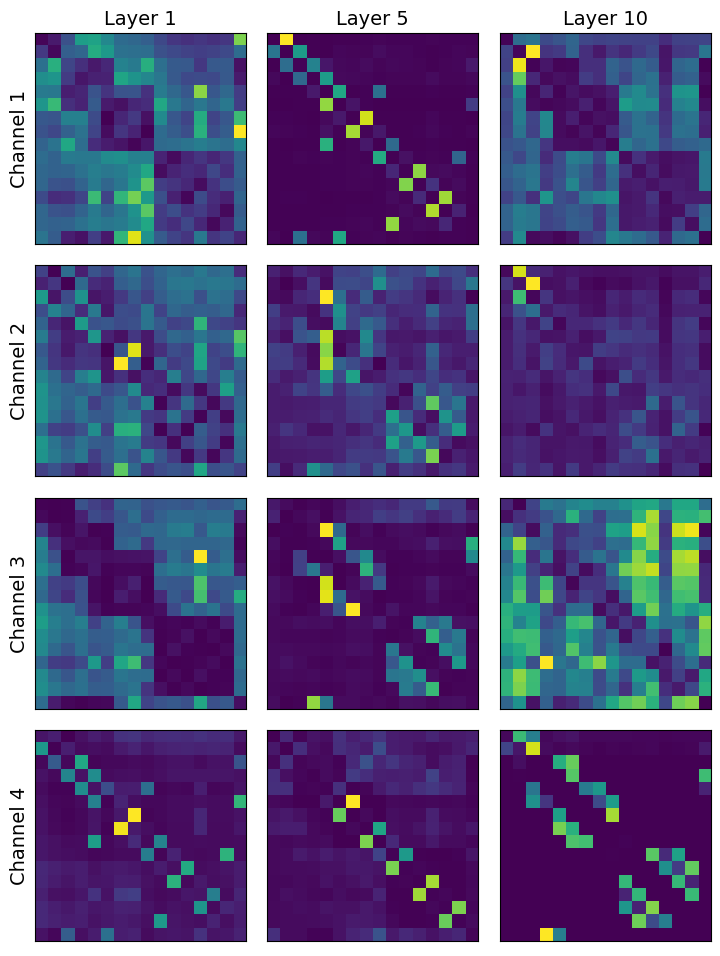

In [8]:
nb_channels = 16
channel_slice = range(4)
# channel_slice = range(26,30)
# channel_slice = range(44,48)
# channel_slice = range(53,57)
# channel_slice = range(57,61)
plt.figure(figsize=(12,12*int(nb_channels/4)))
for rk, layer_idx in enumerate([0,4,9]):
    for channel_idx in channel_slice:
        loc_scores = all_scores[layer_idx][batch_idx][mask]
        num_nodes = int(np.sqrt(loc_scores.shape[0]))
        loc_scores = loc_scores.reshape((num_nodes, num_nodes ,*loc_scores.shape[1:]))
        plt.subplot(nb_channels,3,channel_idx*3 + rk + 1)
        plt.imshow(loc_scores[:,:,head_idx,channel_idx].numpy())
        #plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        if rk==0:
            plt.ylabel(f'Channel {channel_idx + 1}', fontsize=14)
        if channel_idx==0:
            plt.title(f'Layer {layer_idx+1}', fontsize=14)
plt.subplots_adjust(wspace=-.5, hspace=.1)
plt.show()

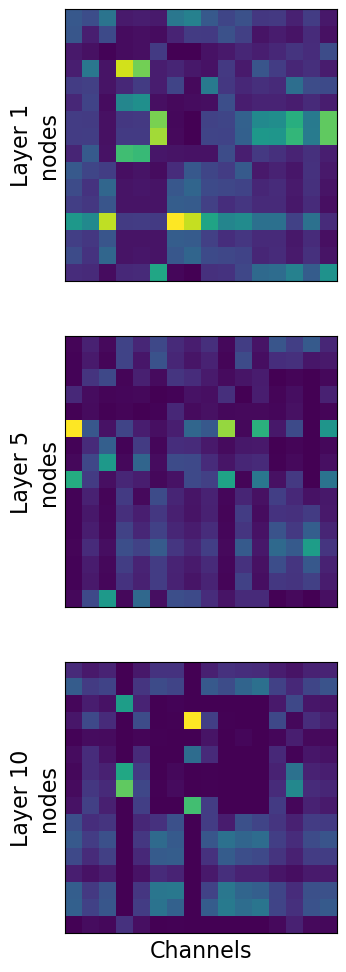

In [53]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_scores[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    # main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

In [55]:
neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy()

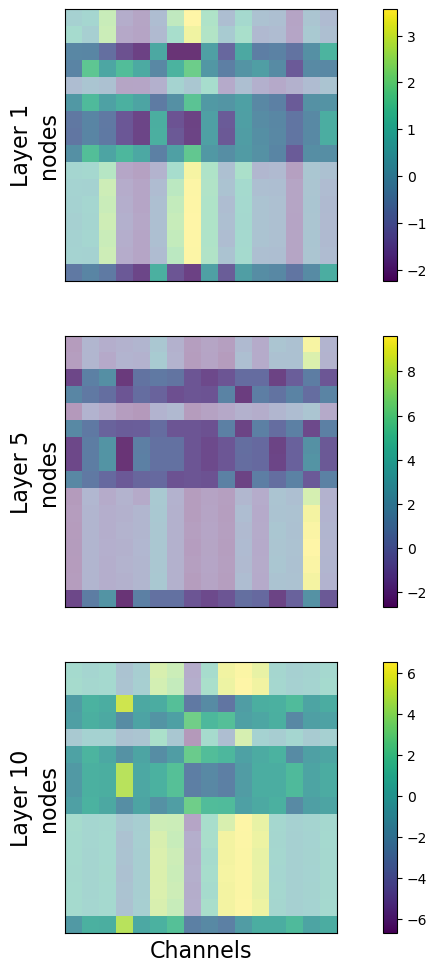

In [59]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_E[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy() - batch.ptr[batch_idx].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    #main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

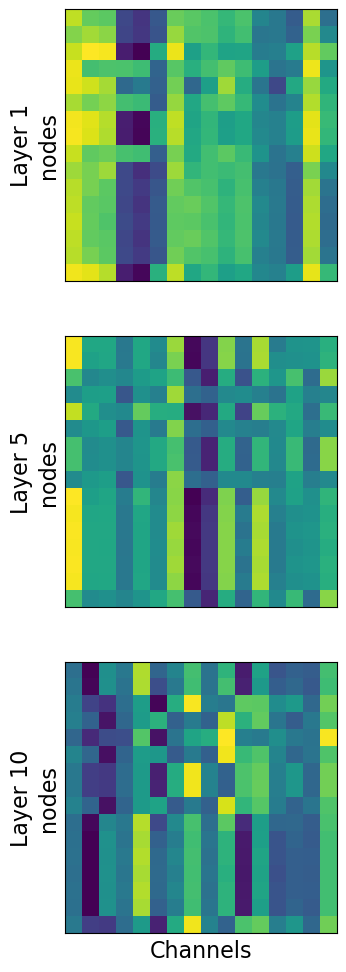

In [61]:
main = plt.figure(figsize=(12,12));
tampon = plt.figure(figsize=(12,12));
tmp = tampon.add_subplot(111)
for rk, layer_idx in enumerate([0,4,9]):
    loc_scores = all_Ev[layer_idx][batch_idx][mask]
    num_nodes = int(np.sqrt(loc_scores.shape[0]))
    loc_scores = loc_scores.reshape((num_nodes, num_nodes, *loc_scores.shape[1:]))
    loc_scores = loc_scores[node_idx,:,head_idx,:].numpy()
    
    # neighbors = batch.edge_index[:,batch.edge_index[0,:]==batch_node_idx][1].numpy() - batch.ptr[batch_idx].numpy()
    # transparency = np.ones(23) * 4 # 6
    # transparency[neighbors] += 4 # 8
    # transparency = np.repeat(transparency.reshape(-1,1), 
    #                          repeats=loc_scores.shape[-1], axis=1)
    # im = tmp.imshow(loc_scores, alpha=1.0)
    ax = main.add_subplot(3,1,rk+1)
    ax.imshow(loc_scores)#, alpha=transparency*.1)
    #main.colorbar(im, ax=ax)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(f'Layer {layer_idx+1}\nnodes', fontsize=16)
ax.set_xlabel('Channels', fontsize=16)
plt.close(tampon)
main.show()

In [34]:
batch.edge_index[:,:30]

tensor([[ 0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,
          4,  4,  4,  4,  4,  5,  5,  6,  6,  7,  7,  7],
        [ 1,  0,  2,  3,  4, 14, 15,  1,  3,  4, 14, 15,  1,  2,  4, 14, 15,  1,
          2,  3,  5, 14, 15,  4,  6,  5,  7,  6,  8,  9]])

In [36]:
from graphgps.transform.transforms import get_rings

In [38]:
rings = get_rings(batch.edge_index, max_k=18)

In [42]:
nodes_mapping = batch.batch[batch.ptr[1]:batch.ptr[2]]

In [48]:
true_node_idx = batch.ptr[batch_idx]+node_idx

tensor([  0,  16,  39,  63,  85, 105, 128, 144, 166, 184, 207, 233, 254, 277,
        300, 326, 354, 383, 409, 432, 450, 470, 499, 511, 531, 556, 580, 607,
        638, 661, 685, 705, 732])

In [49]:
batch

DataBatch(x=[732, 16], edge_index=[2, 2892], edge_attr=[2892, 16], y=[32], pestat_RWSE=[732, 20], ring_index=[2, 2270], batch=[732], ptr=[33], edge_dense=[32, 31, 31, 16], attn_mask=[32, 31, 31], graph_feature=[32, 1])